# Implementation Denoising Autoencoder on MNIST dataset


In [1]:
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from matplotlib import pyplot as plt

In [2]:
def to_img(y):
  y = 0.5 * (y+1)
  y = y.view(y.size(0), 28, 28)
  return y

In [21]:
def display_images(in_, out, n=1):
  for N in range(n):
    if in_ is not None:
      in_pic = to_img(in_.cpu().data)
      plt.figure(figsize=(18,6))
      for i in range(4):
        plt.subplot(1,4,i+1)
        plt.imshow(in_pic[i+4*N])
        plt.axis('off')
    out_pic = to_img(out.cpu().data)
    print(out_pic.shape)
    plt.figure(figsize=(18,6))
    for i in range(4):
      plt.subplot(1,4,i+1)
      plt.imshow(out_pic[i+4*N])
      plt.axis('off')

In [6]:
batch_size = 256

img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataset = MNIST('./data', transform=img_transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 15671921.43it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 478791.53it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4344925.26it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3002447.40it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [17]:
d = 500

class Autoencoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder = nn.Sequential(
        nn.Linear(28*28, d),
        nn.Tanh()
    )
    self.decoder = nn.Sequential(
        nn.Linear(d, 28*28),
        nn.Tanh()
    )

  def forward(self, x):
    y = self.encoder(x)
    z = self.decoder(y)
    return z

model = Autoencoder().to(device)
criterion = nn.MSELoss()

In [18]:
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

epoch [1/20], loss: 0.0689
epoch [2/20], loss: 0.0591
epoch [3/20], loss: 0.0539
epoch [4/20], loss: 0.0462
epoch [5/20], loss: 0.0480
epoch [6/20], loss: 0.0472
epoch [7/20], loss: 0.0453
epoch [8/20], loss: 0.0479
epoch [9/20], loss: 0.0440
epoch [10/20], loss: 0.0467
epoch [11/20], loss: 0.0413


<ipython-input-13-6b31f6c32a48>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(18,6))


epoch [12/20], loss: 0.0428
epoch [13/20], loss: 0.0415
epoch [14/20], loss: 0.0429
epoch [15/20], loss: 0.0428
epoch [16/20], loss: 0.0412
epoch [17/20], loss: 0.0420
epoch [18/20], loss: 0.0392
epoch [19/20], loss: 0.0415
epoch [20/20], loss: 0.0395


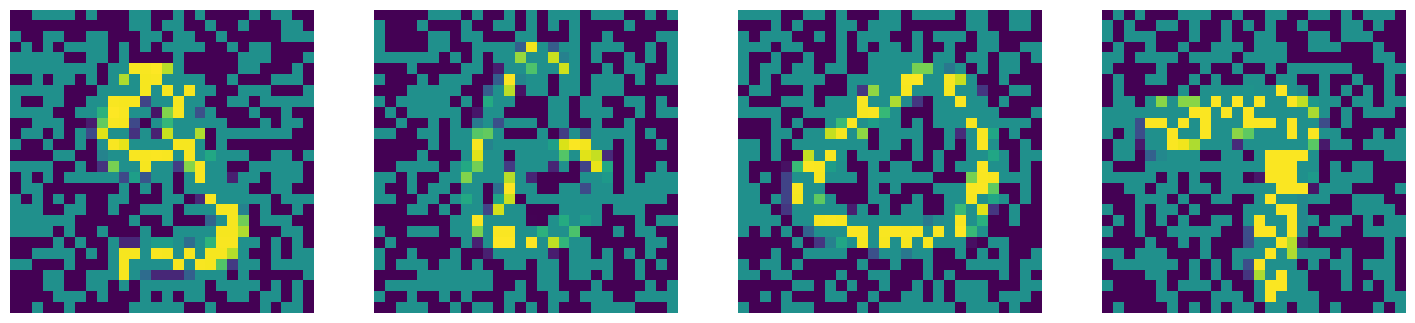

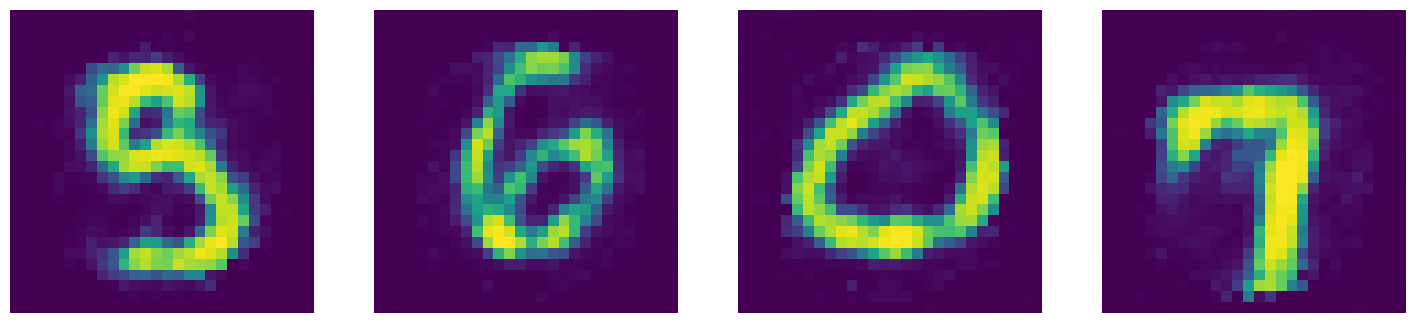

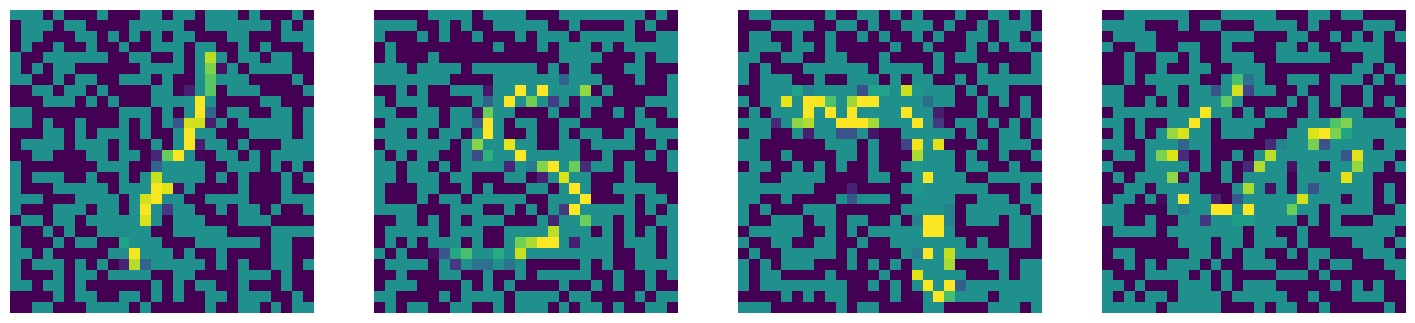

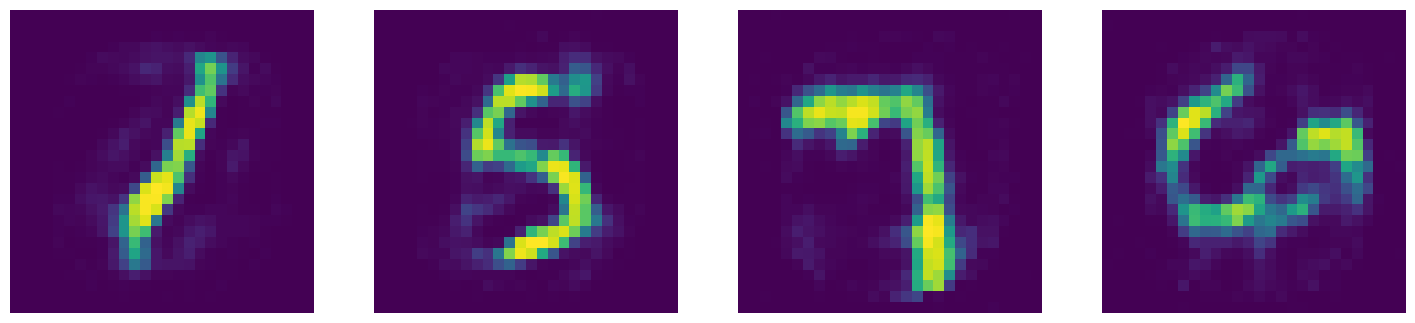

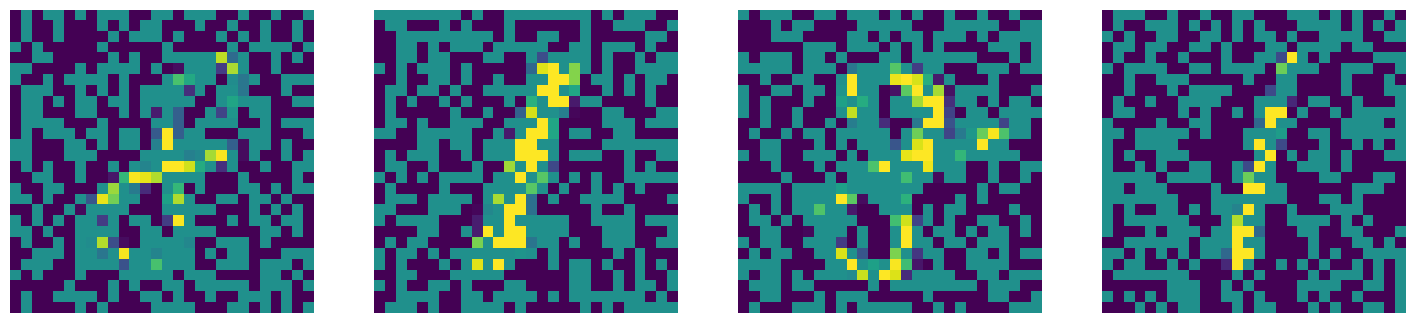

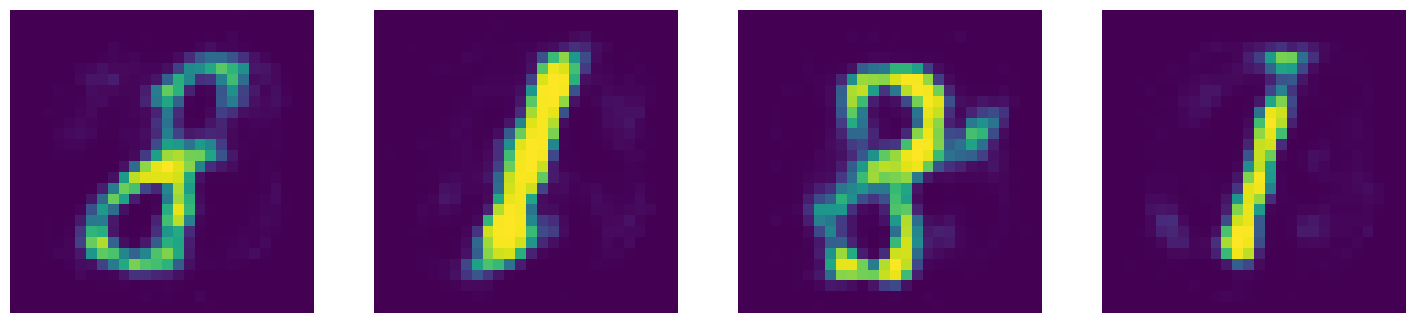

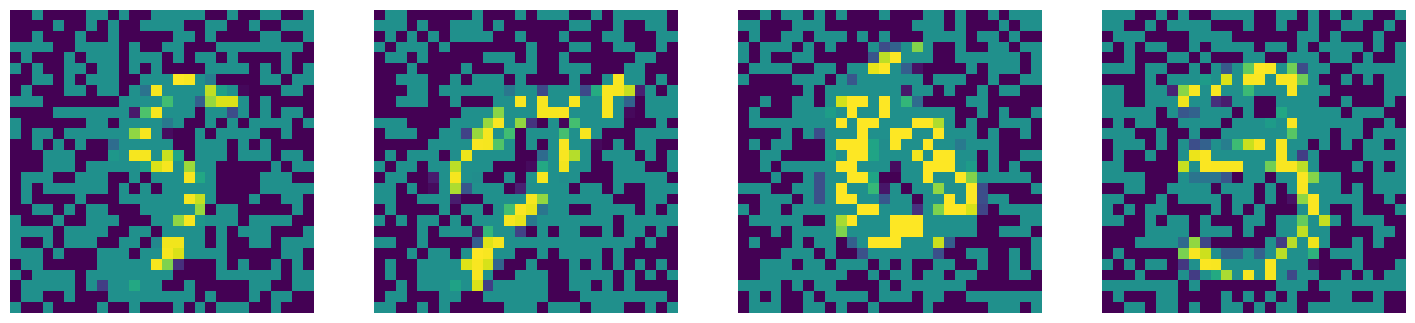

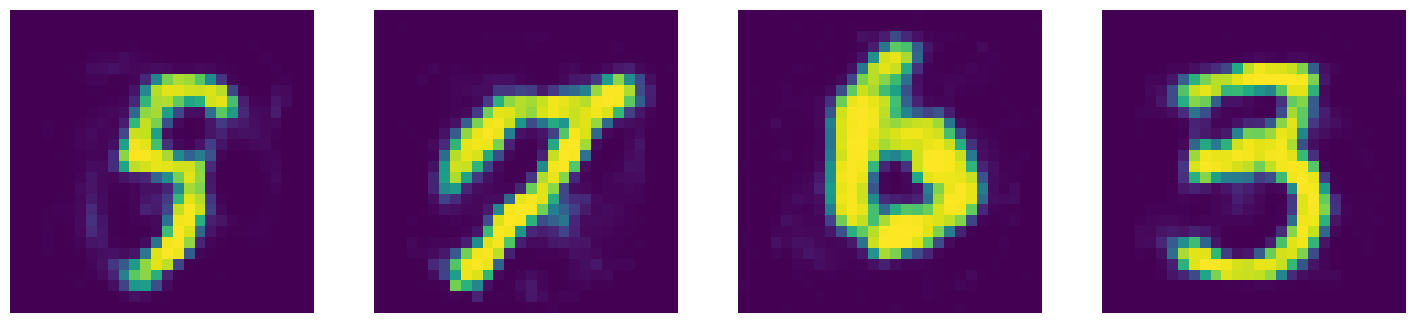

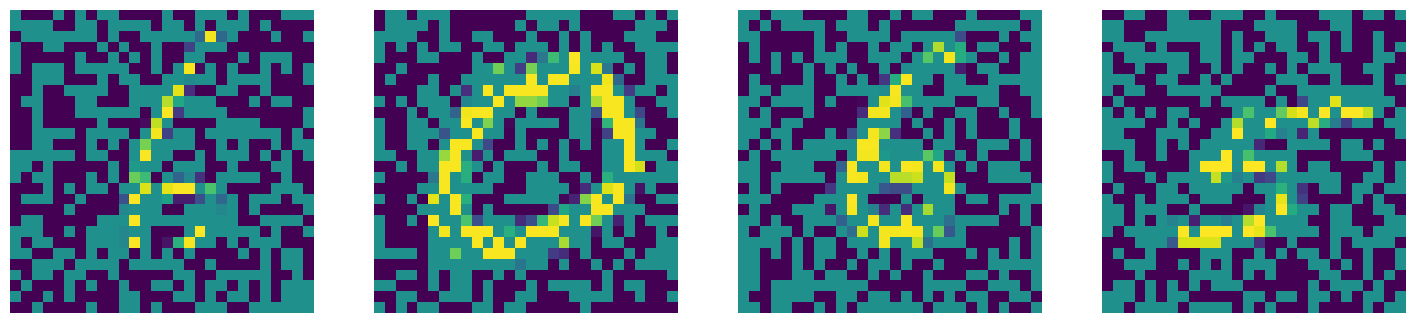

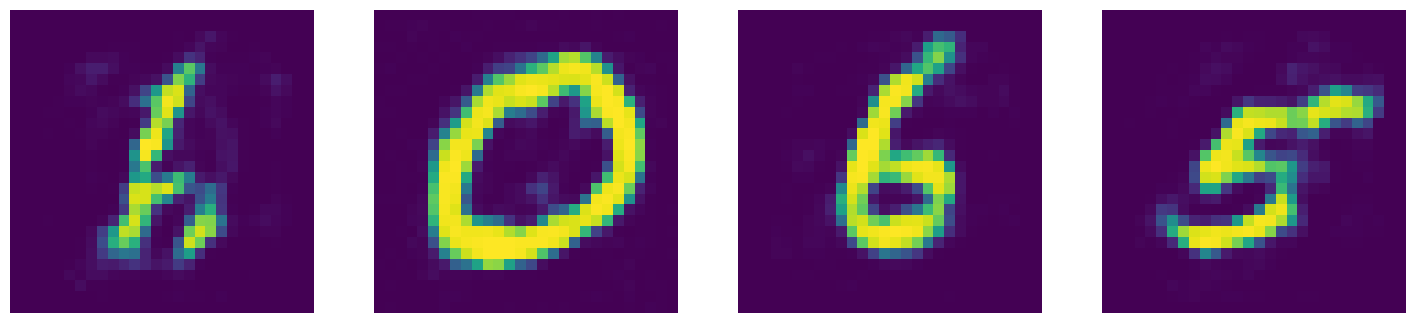

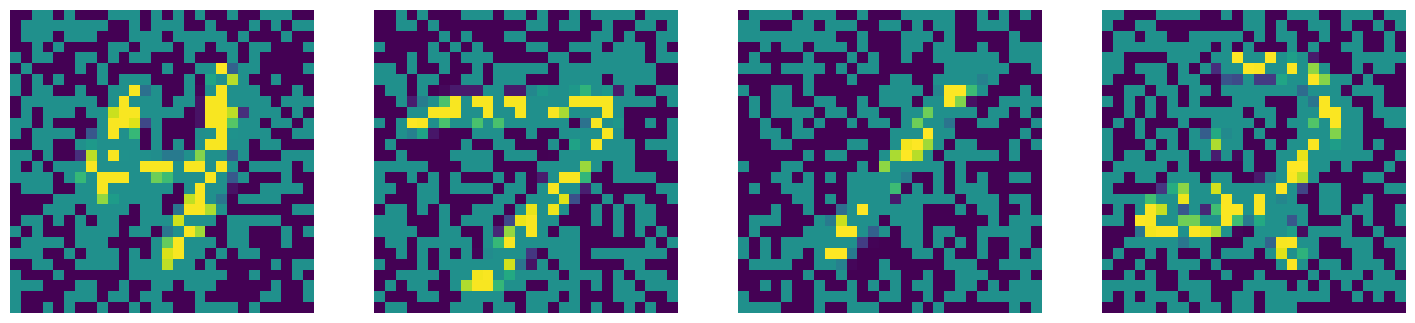

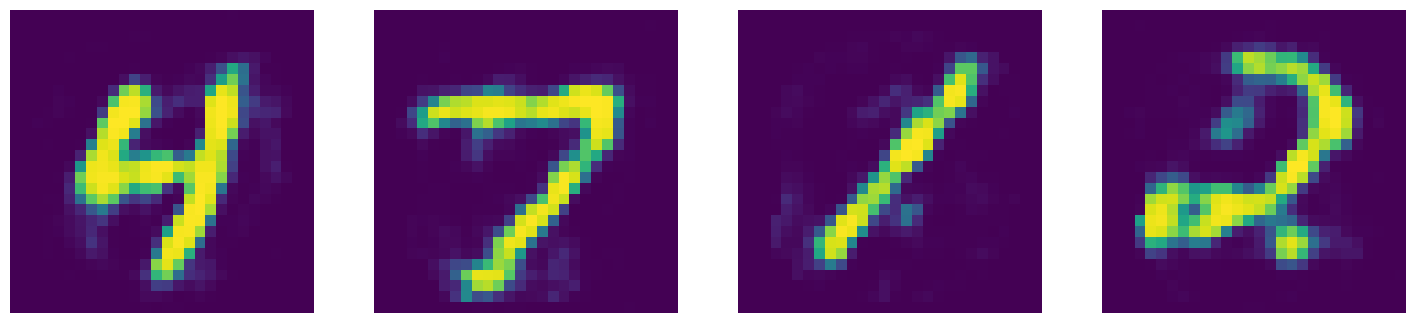

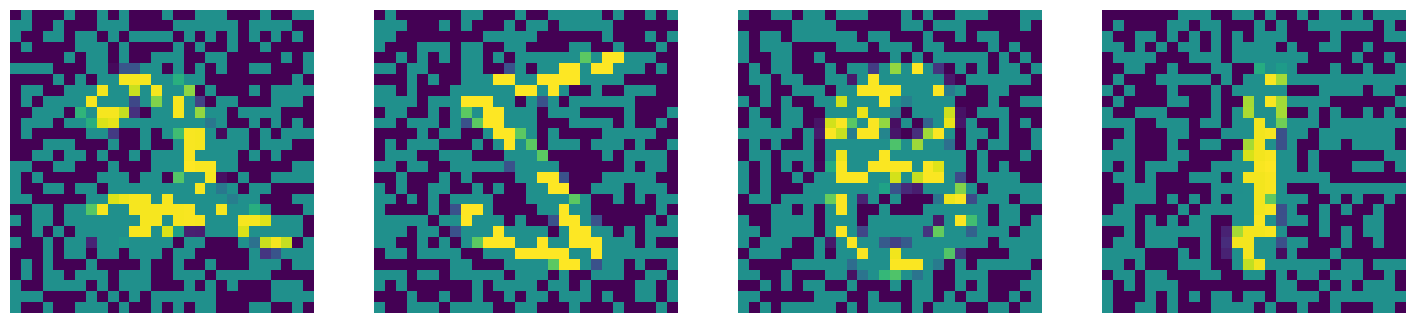

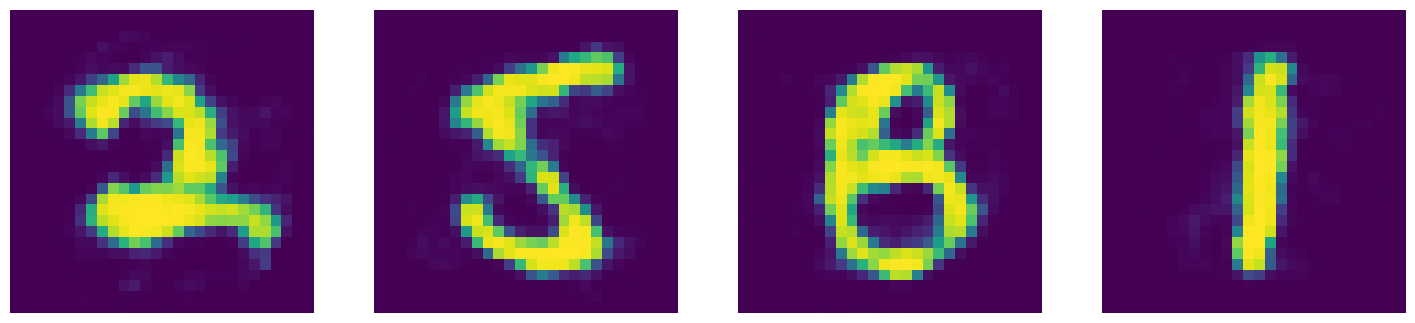

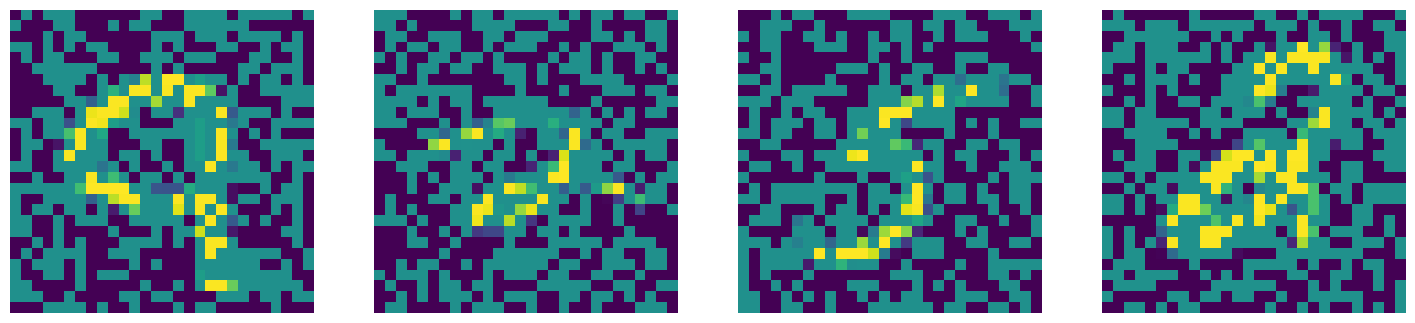

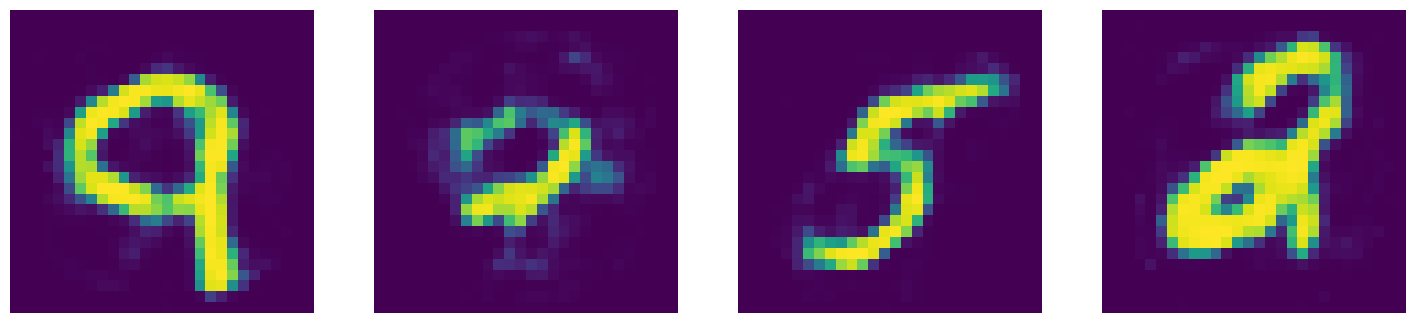

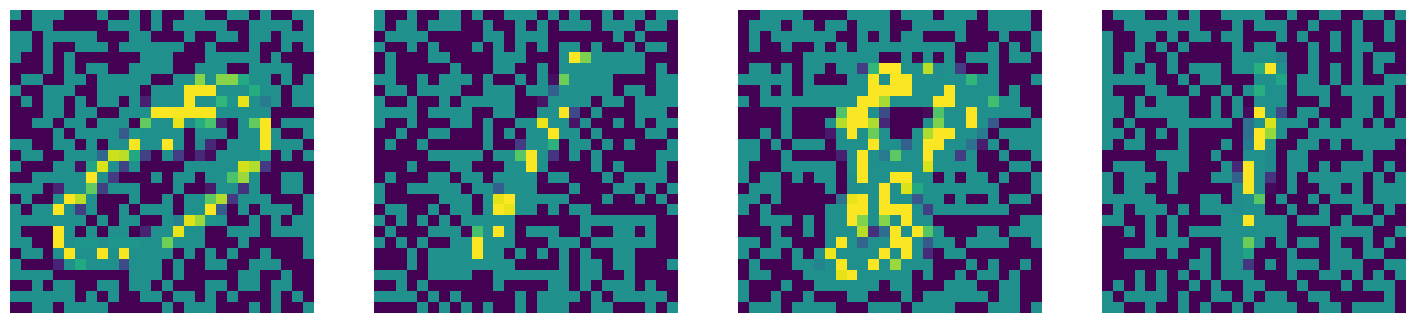

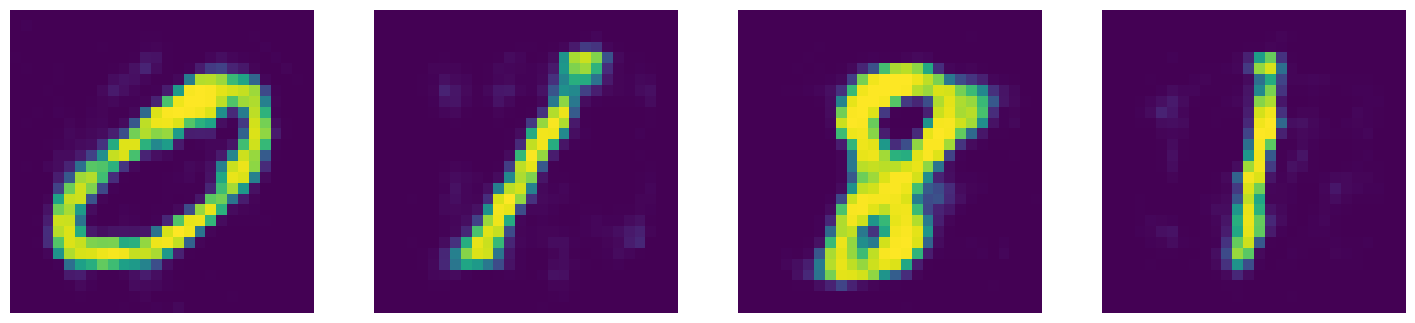

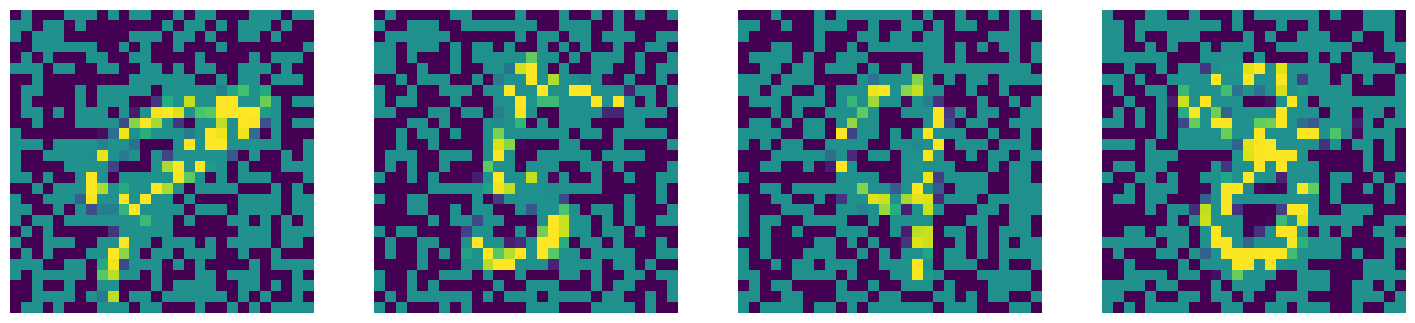

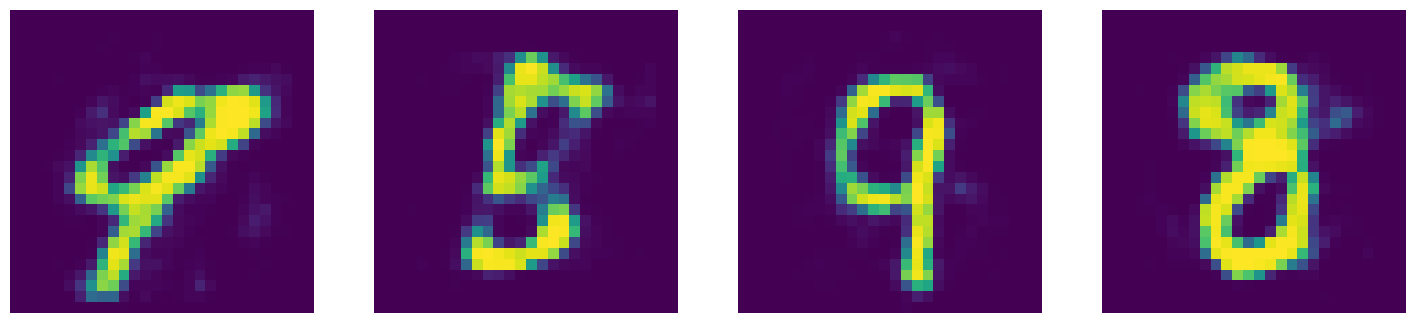

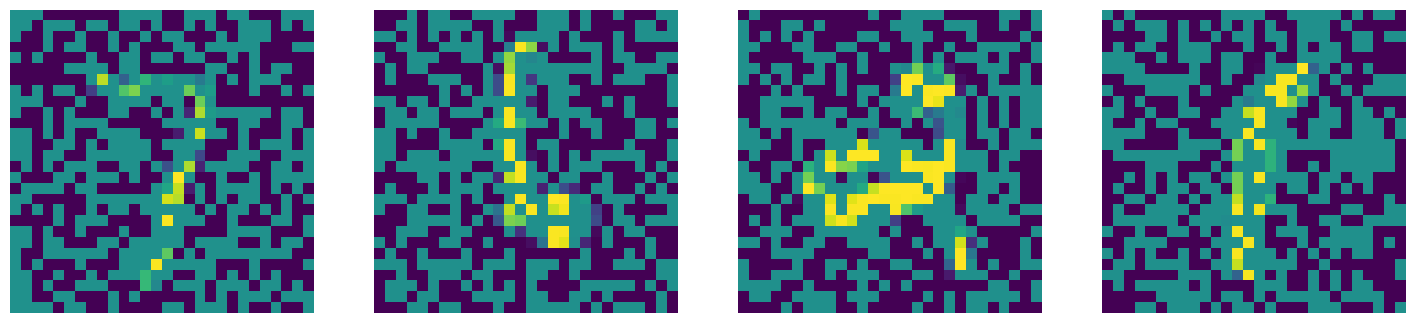

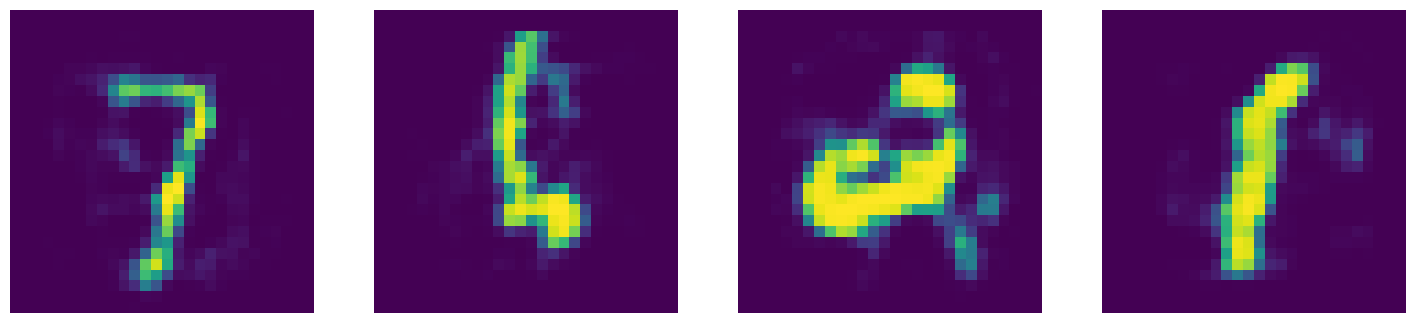

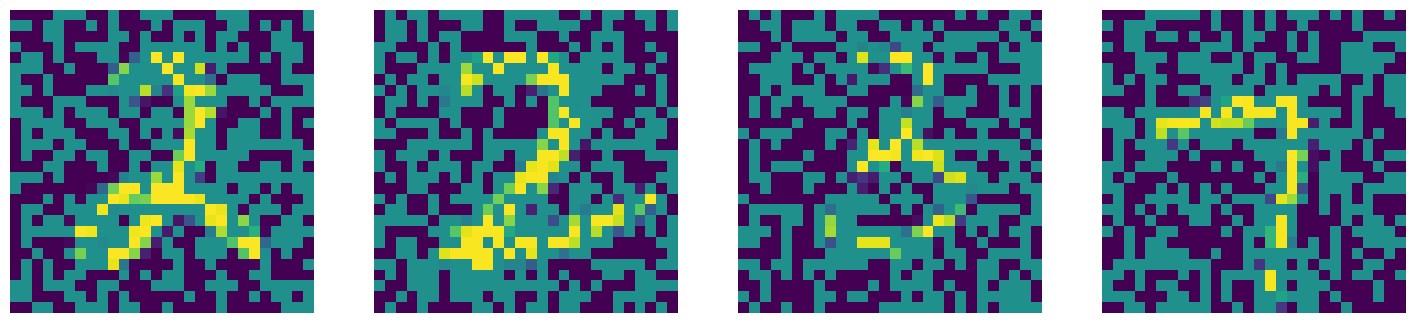

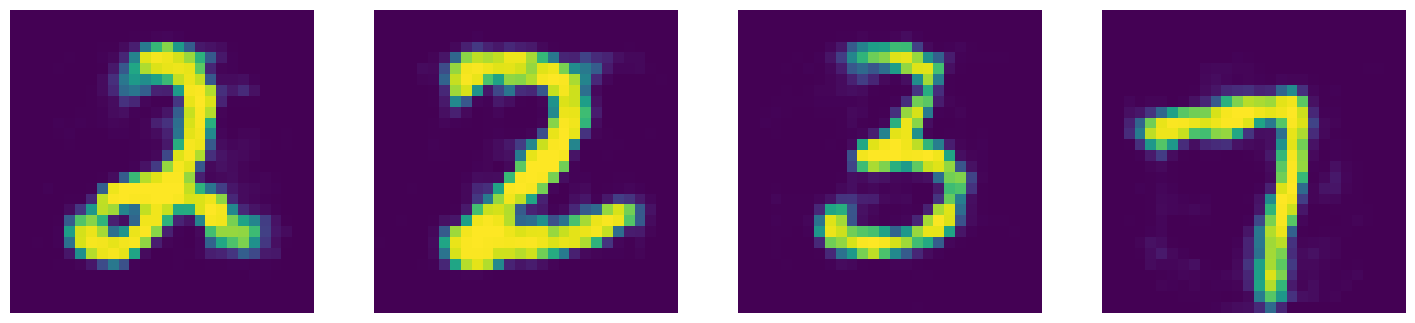

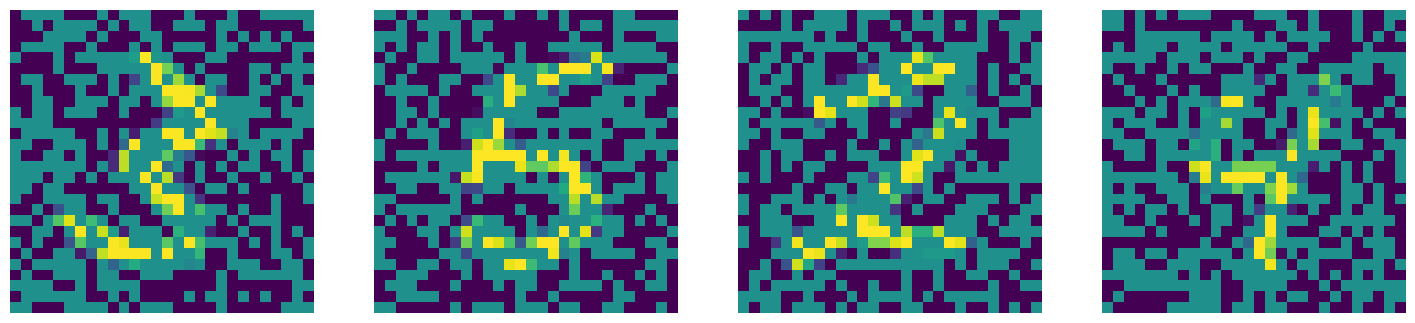

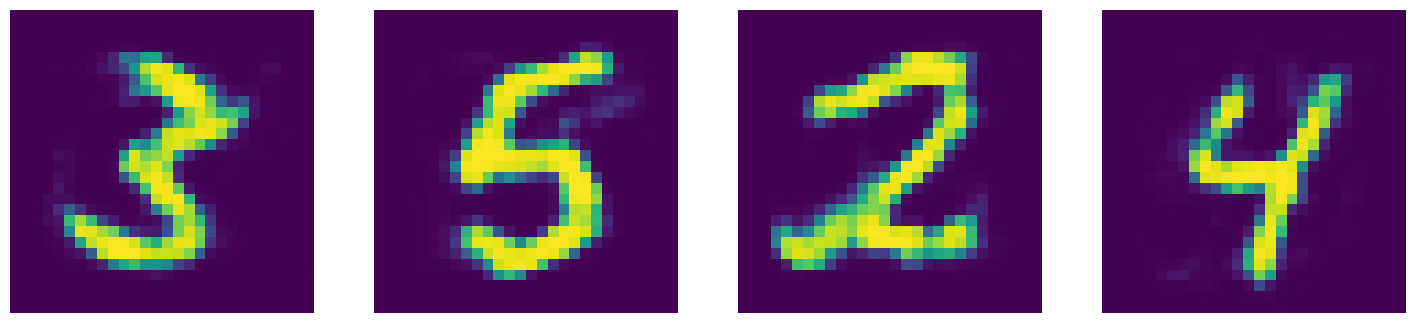

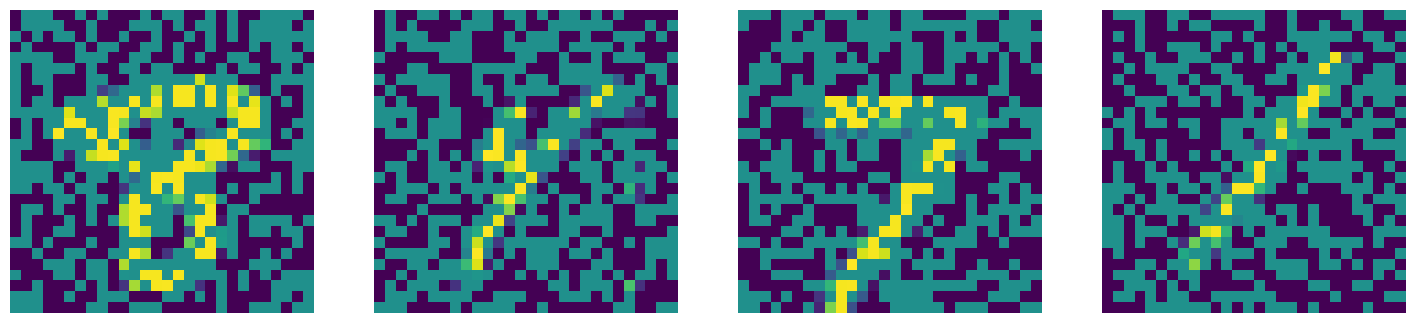

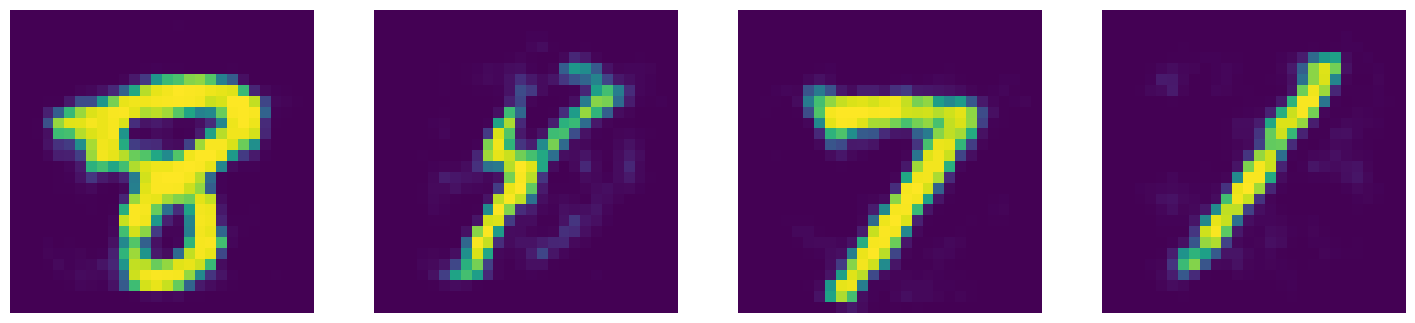

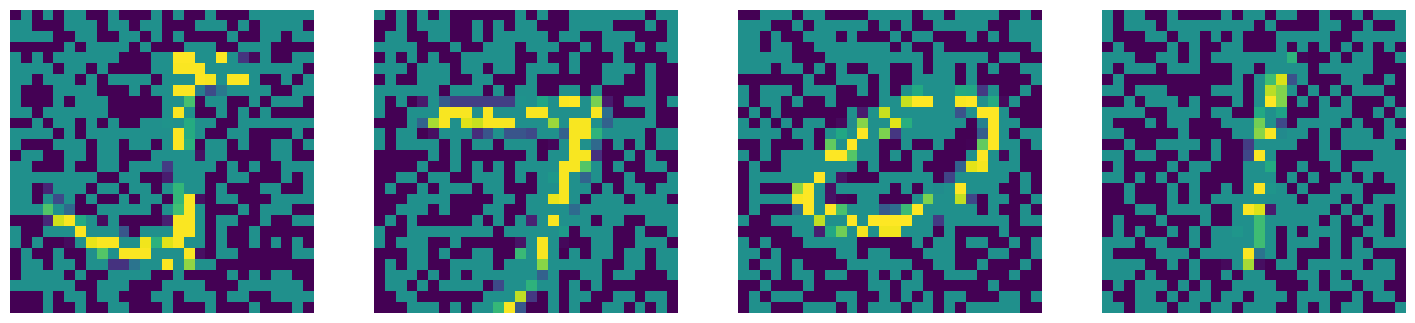

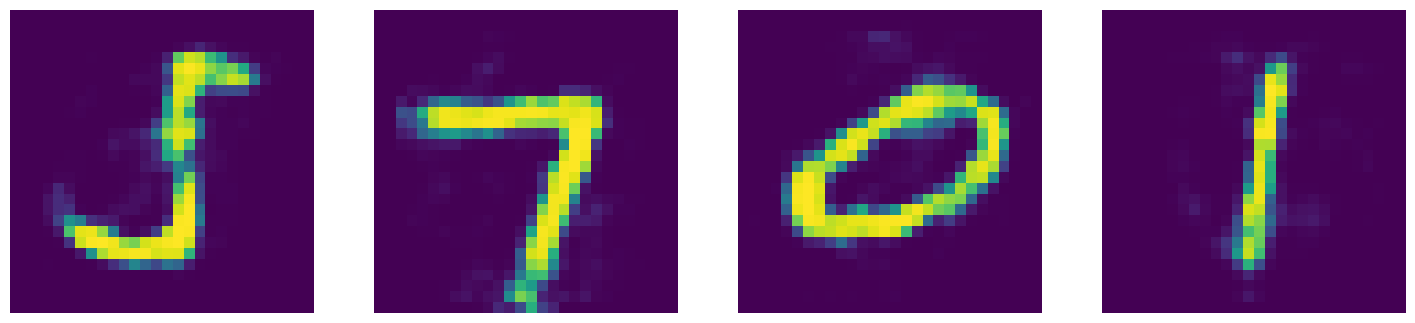

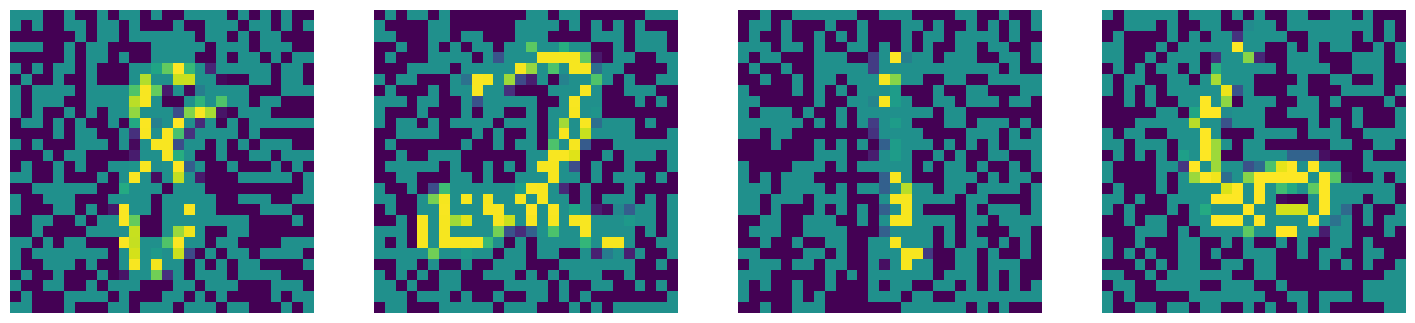

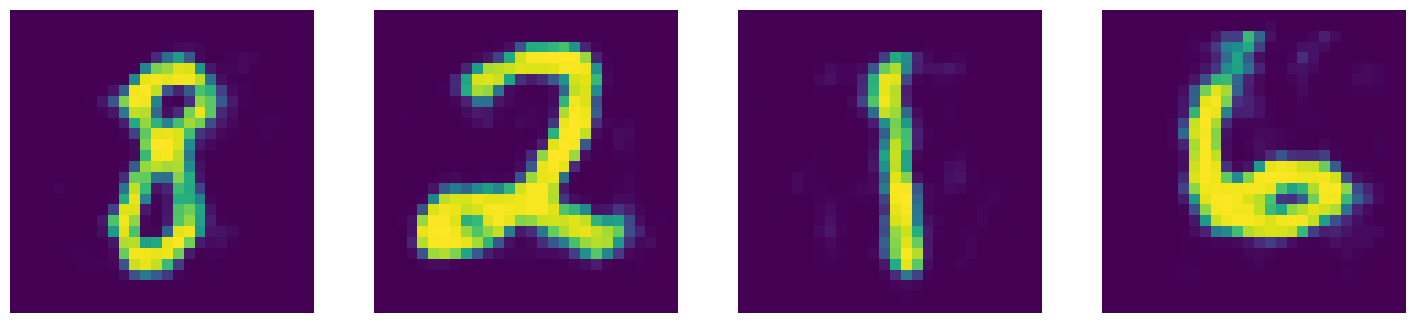

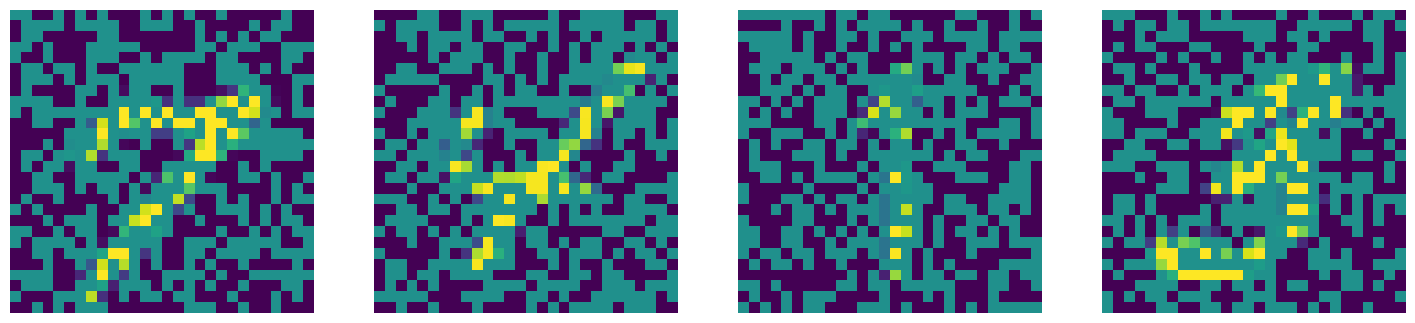

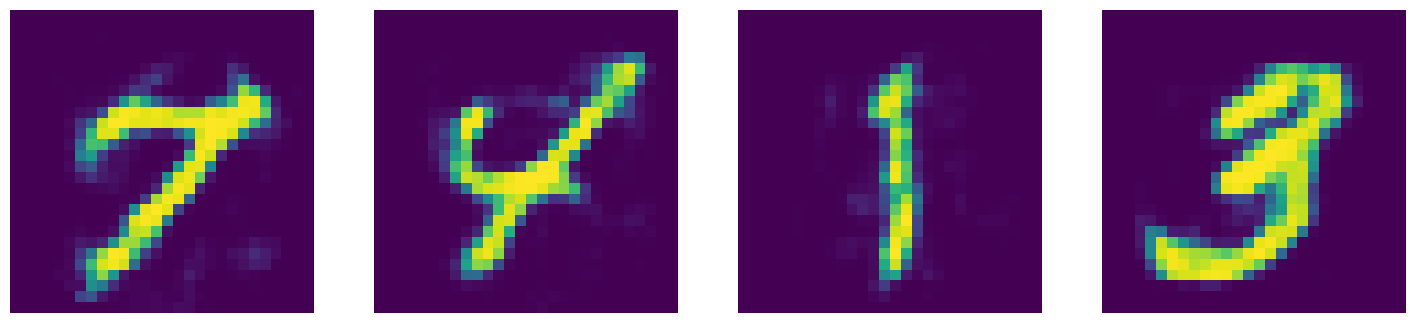

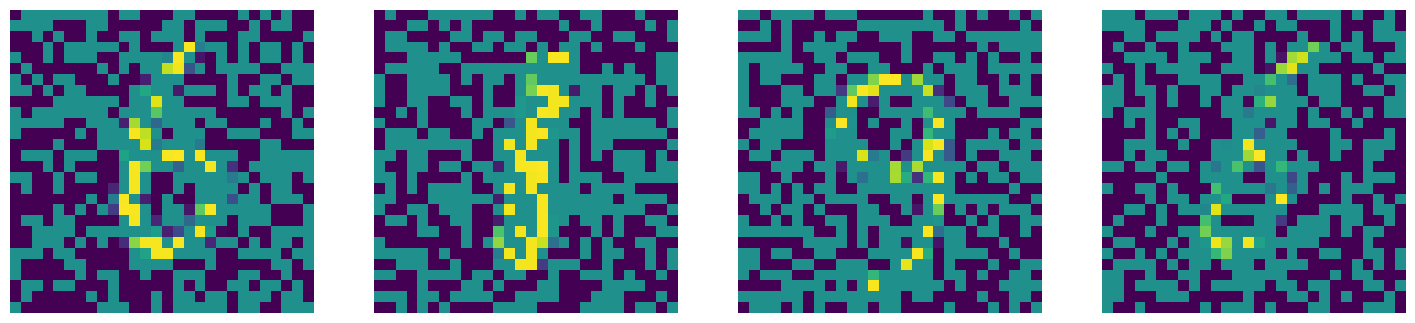

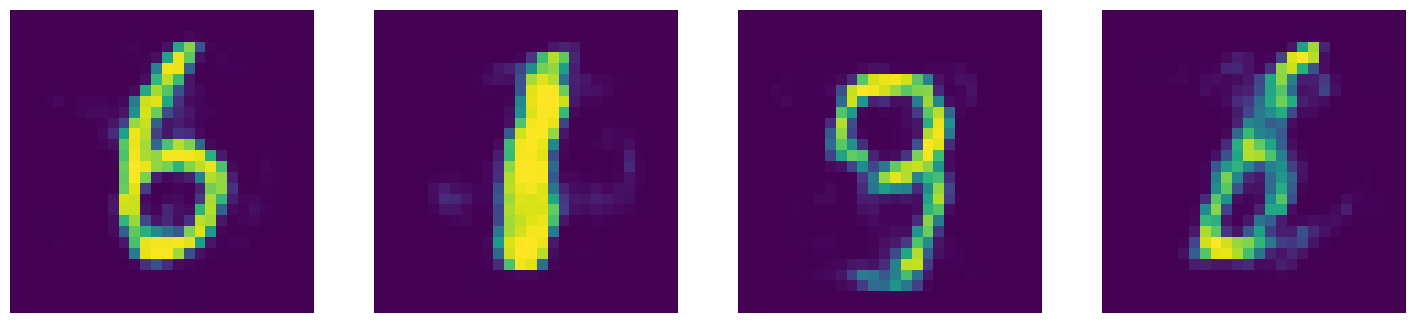

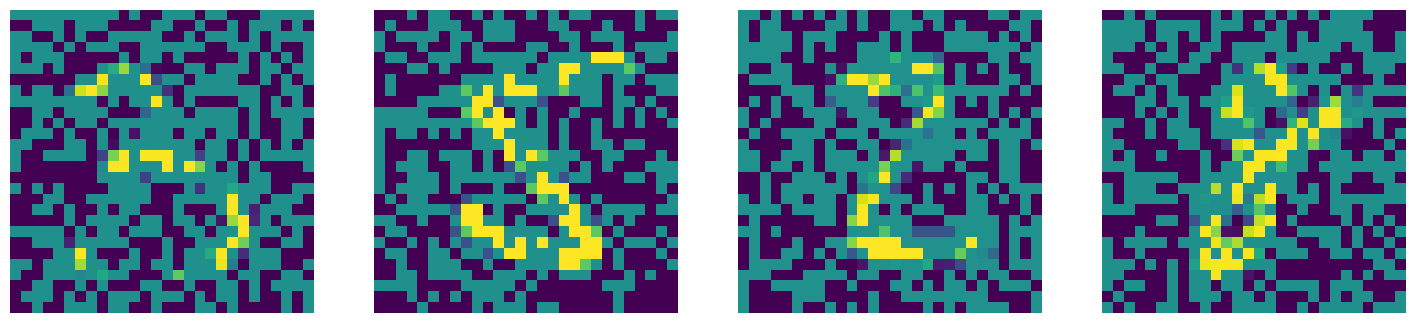

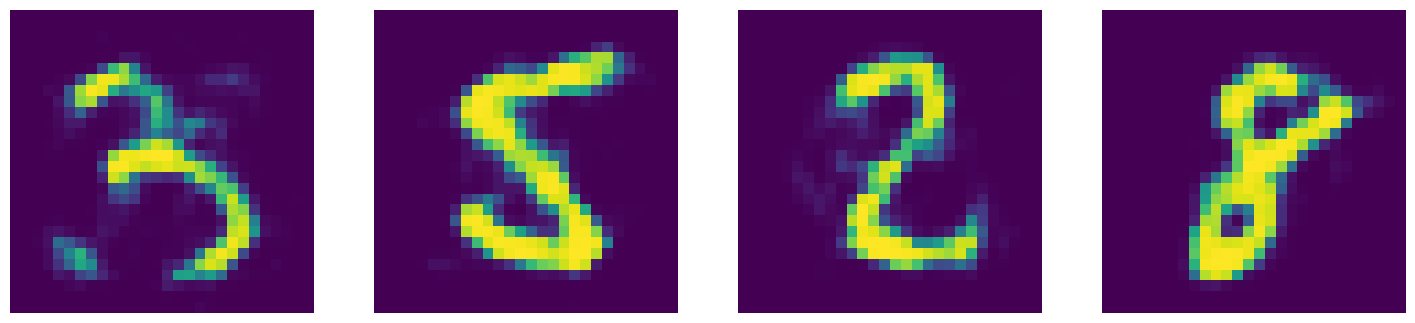

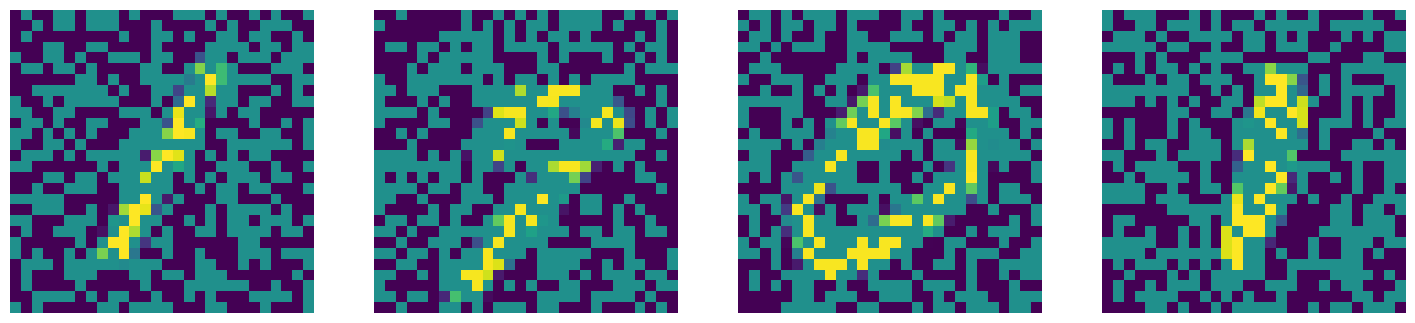

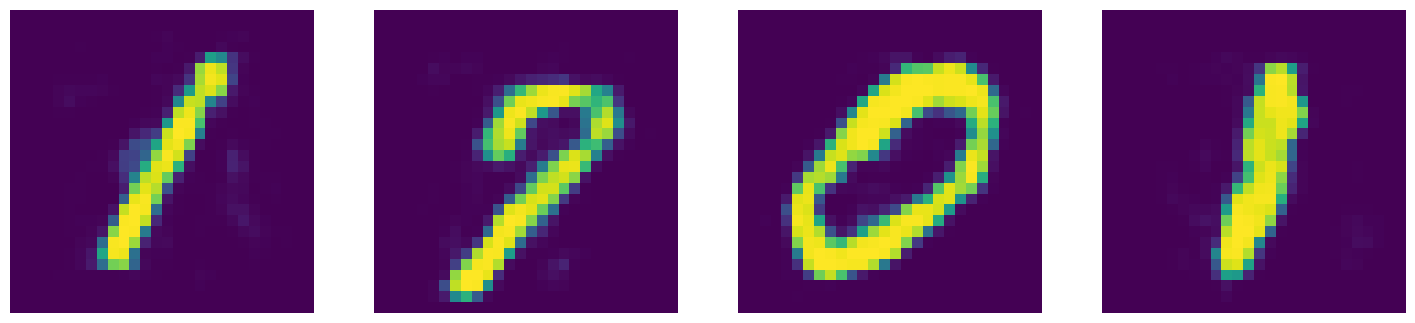

In [19]:
num_epochs = 20
do = nn.Dropout()
for epoch in range(num_epochs):
  for data in dataloader:
    img, _ = data
    img = img.to(device)
    img = img.view(img.size(0), -1)

    noise = do(torch.ones(img.shape)).to(device)
    img_bad = (img*noise).to(device)

    output = model(img_bad)
    loss = criterion(output, img.data)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print(f'epoch [{epoch+1}/{num_epochs}], loss: {loss.item():.4f}')
  display_images(img_bad, output)

torch.Size([500, 28, 28])
torch.Size([500, 28, 28])
torch.Size([500, 28, 28])
torch.Size([500, 28, 28])
torch.Size([500, 28, 28])


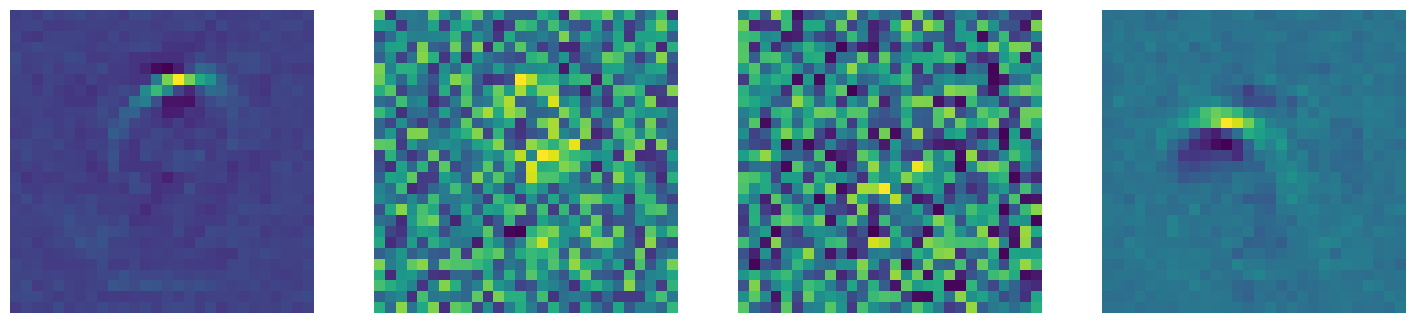

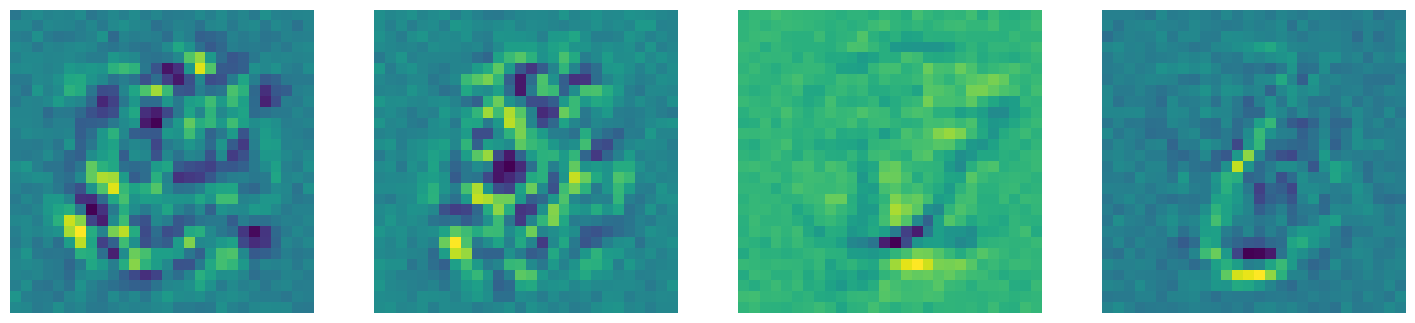

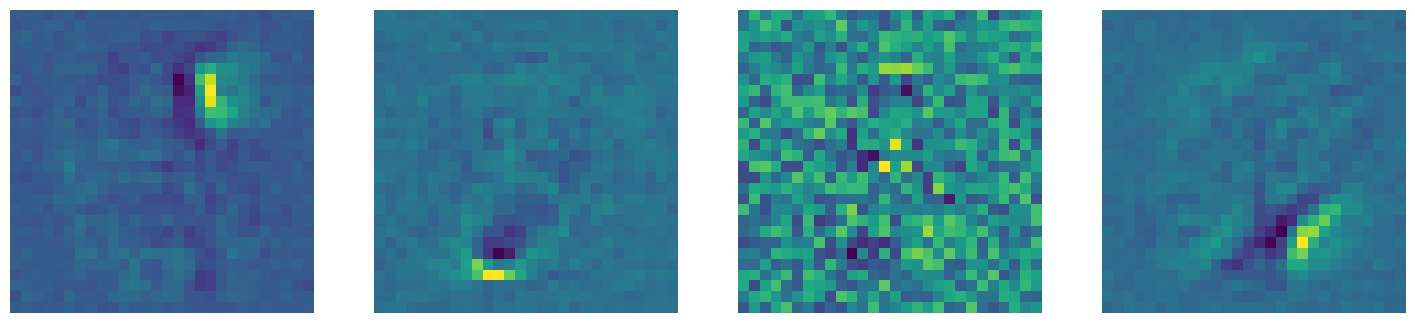

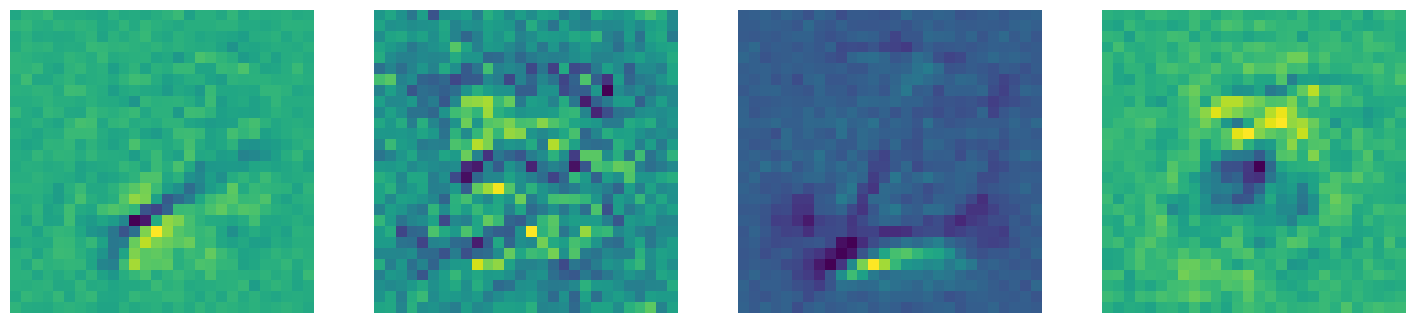

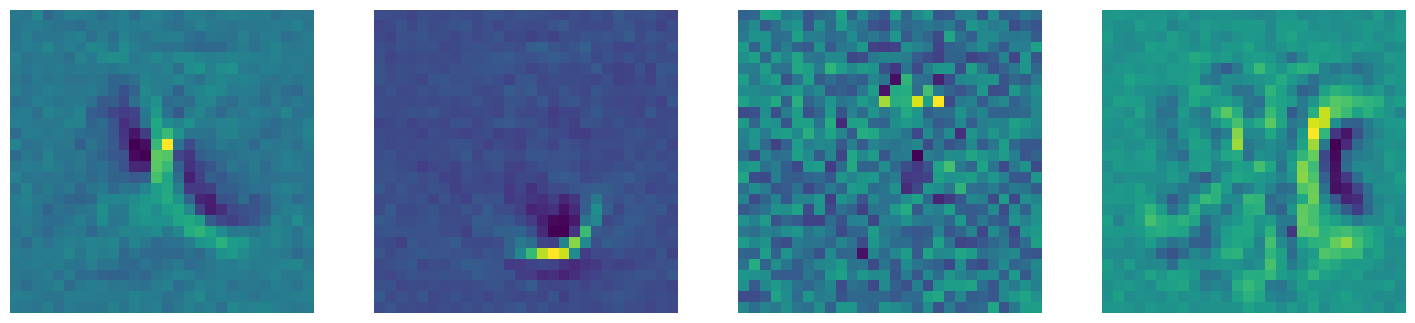

In [22]:
display_images(None, model.encoder[0].weight, 5)